In [1]:
from datascience import *
from collections import Counter
import numpy as np
from scipy import stats
%matplotlib inline

## Data

We'll continue using the NCVS data for this lab!

In [2]:
incidents = Table.read_table('../data/incident/36828-0004-Data.tsv', delimiter='\t')
incidents

V4001,YEARQ,IDHH,IDPER,V4002,V4003,V4004,V4005,V4006,V4008,V4009,V4010,V4011,V4012,V4013,V4014,V4015,V4016,V4017,V4018,V4019,V4021B,V4022,V4023,V4023B,V4024,V4025,V4026,V4027,V4028,V4029,V4030,V4031,V4032,V4033,V4034,V4035,V4036,V4037,V4038,V4039,V4040,V4041A,V4041B,V4041C,V4042,V4043,V4044,V4045,V4046,V4047,V4048,V4049,V4050,V4051,V4052,V4053,V4054,V4055,V4056,V4057,V4058,V4059,V4060,V4061,V4062,V4063,V4064,V4065,V4066,V4067,V4068,V4069,V4070,V4071,V4072,V4073,V4074,V4075,V4076,V4077,V4078,V4079,V4080,V4081,V4082,V4083,V4084,V4085,V4086,V4087,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096,V4097,V4098,V4099,V4100,V4101,V4102,V4103,V4104,V4105,V4106,V4107,V4108,V4109,V4110,V4111,V4112,V4113,V4114,V4115,V4116,V4117,V4118,V4119,V4120,V4121,V4122,V4123,V4124,V4125,V4126,V4127,V4128,V4129,V4130,V4131,V4132,V4133,V4134,V4135,V4136,V4137,V4138,V4139,V4140,V4140B1,V4140B2,V4140B3,V4140B4,V4140B5,V4140B6,V4140B7,V4140B8,V4140B9,V4140B10,V4140B11,V4140B12,V4140B13,V4140B14,V4140B15,V4140B16,V4140B17,V4140B18,V4140B19,V4140B20,V4140B21,V4140B22,V4140B23,V4140B24,V4140B25,V4140B26,V4140B27,V4140B28,V4140B29,V4140B30,V4140B31,V4140B32,V4140B33,V4140B34,V4140B35,V4140A,V4141,V4142,V4143,V4144,V4145,V4146,V4147,V4148,V4149,V4150,V4151,V4152,V4153,V4154,V4155,V4156,V4157,V4158,V4159,V4160,V4161,V4162,V4163,V4164,V4165,V4166,V4167,V4168,V4169,V4170,V4171,V4172,V4173,V4174,V4175,V4176,V4177,V4178,V4179,V4180,V4181,V4182,V4183,V4184,V4185,V4186,V4187,V4188,V4189,V4190,V4191,V4192,V4193,V4194,V4195,V4196,V4197,V4198,V4199,V4200,V4201,V4202,V4203,V4204,V4205,V4206,V4207,V4208,V4209,V4210,V4211,V4212,V4213,V4214,V4215,V4216,V4217,V4218,V4219,V4220,V4221,V4222,V4223,V4224,V4225,V4226,V4227,V4228,V4229,V4230,V4231,V4232,V4233,V4234,V4235,V4236,V4237,V4237A,V4238,V4239,V4240,V4241,V4242,V4243,V4244,V4245,V4246A,V4246B,V4246C,V4246D,V4246E,V4246F,V4246G,V4246H,V4247,V4248,V4249,V4250,V4251,V4252,V4252A,V4252B,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V4260,V4261,V4262,V4263,V4264,V4265,V4266,V4267,V4268,V4269,V4270,V4271,V4272,V4273,V4274,V4275,V4276,V4277,V4277A,V4277B,V4277C,V4277D,V4277E,V4278,V4279,V4280,V4281,V4282A,V4282B,V4282C,V4283,V4284,V4285A,V4286,V4287,V4288,V4289,V4290,V4291,V4292,V4293,V4294,V4295,V4296,V4297,V4298,V4299,V4300,V4301,V4302,V4303,V4304,V4305,V4306,V4307,V4308,V4309,V4310,V4311,V4312,V4313,V4314,V4315,V4316,V4317,V4318,V4319,V4320,V4321,V4322,V4323,V4324,V4325,V4326,V4327,V4328,V4329,V4330,V4331,V4332,V4333,V4334,V4335,V4336,V4337,V4338,V4339,V4340,V4341,V4342,V4343,V4344,V4345,V4346,V4347,V4348,V4349,V4350,V4351,V4352,V4353,V4354,V4355,V4356,V4357,V4357A,V4357B,V4358,V4359,V4360,V4361,V4362,V4363,V4364,V4365,V4366,V4367,V4368,V4369,V4370,V4371,V4372,V4373,V4374,V4375,V4376,V4377,V4378,V4379,V4380,V4381,V4382,V4383,V4384,V4385,V4386A,V4387,V4388,V4389,V4390,V4391,V4392,V4393,V4394,V4395,V4396,V4397,V4398,V4399,V4400,V4401,V4402,V4403,V4404,V4405,V4406,V4407,V4408,V4409,V4410,V4411,V4412,V4413,V4414,V4415,V4416,V4417,V4418,V4419,V4420,V4421,V4422,V4423,V4424,V4425,V4426,V4427,V4428,V4429,V4430,V4431,V4432,V4433,V4434,V4435,V4436,V4437,V4438,V4439,V4440,V4441,V4442,V4443,V4444,V4445,V4446,V4447,V4448,V4449,V4450,V4451,V4452,V4453,V4454,V4455,V4456,V4457,V4458,V4459,V4460,V4461,V4462,V4463,V4464,V4465,V4466,V4467,V4468,V4469,V4470,V4471,V4472,V4473,V4474,V4475,V4476,V4477,V4478,V4479,V4480,V4481A,V4481B,V4482,V4482A,V4482B,V4483,V4484,V4485,V4485A,V4486,V4487,V4488,V4489,V4490,V4491,V4492,V4493,V4494,V4495,V4496,V4497,V4498,V4499,V4500,V4501,V4502,V4503,V4504,V4505,V4506,V4507,V4508,V4509,V4510,V4511,V4512,V4513,V4514,V4515,V4516,V4517,V4518,V4519,V4520,V4522,V4522A,V4522B,V4522C,V4522D,V4522E,V4522F,V4522G,V4522H,V4522I,V4523,V4524,V4525,V4526,V4526AA,V4526A,V4526B,V4526C,V4526D,V4526E,V4526F,V4526G,V4526H,V4526HA1,V4526HA2,V4526HA3,V4526HA4,V4526HA5,V4526HA6,V4526HA7,V4526HA8,V4526HA9,V4526H3A,V4526H3B,V4526H4,V4526H5,V4526H6,V4526H7,V4526H9,V4526H10,V4527,SERIES_IWEIGHT,V4528,V4529,WGTVICCY,HELD,V4531,V4532,SERIES_WE

## Empirical Distributions

### Data Manipulation and Plotting Review

Below, write code that relabels column 'V431' to "Cash". This column details the value of cash stolen in a crime incident. Hint: Consult the information for the datascience module: http://data8.org/datascience/tutorial.html

In [ ]:
incidents = incidents.relabeled('V4321', 'Cash')

Next, write code that subsets the data to only include Cash values below 99997 and above 0, then save only the "Cash" column to its own table. Then, plot a histogram of the value of cash stolen.

In [ ]:
cash = incidents.where('Cash', are.below(99997))
cash = cash.where('Cash', are.above(0))
cash = cash.select('Cash')

In [ ]:
cash.hist("Cash")

### Question 1

What patterns do you notice about the histogram? Is the distribution left or right skewed? What does the skew suggest about what cash values are usually implicated in crime?

### Law of Averages

Write a function, "empirical_hist_crime" that takes the sample size as its argument, and then draws a histogram based on the results. Consult the book for help!

In [ ]:
def empirical_hist_crime(n):
    cash.sample(n).select('Cash').hist(unit = "USD")

Check how many rows are in the table with the "num_rows" method, and then use your self-defined function to plot histograms taking sample sizes 10, 100, 1000, and the total number of rows.

In [ ]:
cash.num_rows

In [ ]:
empirical_hist_crime(10)

In [ ]:
empirical_hist_crime(100)

In [ ]:
empirical_hist_crime(1000)

In [ ]:
empirical_hist_crime(cash.num_rows)

### Question 2

What happens to the histograms (compared to the original frin Q1) as you increase the sample size? How does this relate to the Law of Averages? What is the relationship between sample size and population parameter estimation?

## Hypothesis Testing

In this section, we'll cover the basic tools for hypothesis testing!

### Jury Selection

First, we'll use the jury selection example from the book. Here, we are concerned with making sure that the racial composition of a jury is not statistically different from the racial composition of the population.

In [20]:
# Create the table
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


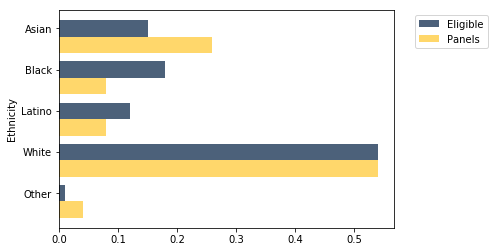

In [21]:
# Horizontal Bar Chart
jury.barh('Ethnicity')

In [ ]:
# Augment with the difference between the "panels" columns and "eligible" column
jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

Write code that converts the Table to a pandas dataframe, and then does a t-test between the "Eligible" and "Panels" columns. Hint for t-test: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

In [ ]:
# Convert to pandas dataframe
jury_with_diffs = jury_with_diffs.to_df()


In [ ]:
stats.ttest_ind(jury_with_diffs['Eligible'], jury_with_diffs['Panels'], equal_var = False)

### Hypothesis Testing on NCVS Data

Now let's try with the NCVS data! Write code that relabels 'V4321' to "Cash," "V4364" to "Property" and subsets both to be above 0 and below 99997. The "Property" column refers to the value of the property lost. Save these two columns in their own table labeled "value_lost"

In [22]:
incidents = Table.read_table('../data/incident/36828-0004-Data.tsv', delimiter='\t')
value_lost = incidents.select(['V4321', 'V4364'])
value_lost = value_lost.relabeled('V4321', 'Cash')
value_lost = value_lost.where('Cash', are.below(99997))
value_lost = value_lost.where('Cash', are.above(0))
value_lost = value_lost.relabeled('V4364', 'Property')
value_lost = value_lost.where('Property', are.below(99997))
value_lost = value_lost.where('Property', are.above(0))
value_lost

Cash,Property
300,1500
60,500
1200,8000
2,200
50,200
10,200
20,400
50,1700
100,600
200,4000


### Question 3

Plot a histogram of both the Cash and Property losses in the same window. Experiment with different bin widths. Visually, what can you infer about the shape of each data?

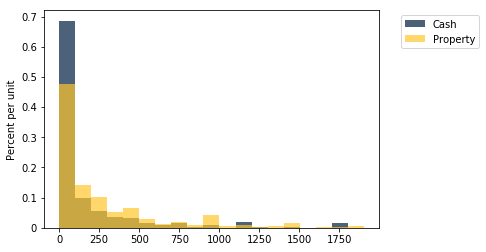

In [23]:
value_lost.hist(bins = np.arange(1, 2000, 100))

### Question 4

Now write code to do a t-test between Cash and Property. Remember to convert to a pandas dataframe first.

In [26]:
value_lost = value_lost.to_df()

AttributeError: 'DataFrame' object has no attribute 'to_df'

In [27]:
stats.ttest_ind(value_lost['Cash'], value_lost['Property'], equal_var = False)

Ttest_indResult(statistic=-8.3709960788836906, pvalue=2.7975639721685962e-16)